Using the http subset of the KDDcup99 dataset, we explore how the parameter max_samples affects the recall, precision and f1 scores for the isolation forest algorithm. 

In [1]:
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset='http')
import numpy as np
X = kdd99_data['data']
y = kdd99_data['target']
y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
import numpy as np

In [3]:
recall_scores = []
precision_scores = []
f1_scores = []

def calculations(n):
    
    isof = IsolationForest(max_samples=n, random_state=42)
    isof.fit(X)
    anomaly_predictions = isof.predict(X)
    anomaly_predictions = np.array(anomaly_predictions)
#     print(anomaly_predictions[0:100])
    
  
    anomaly_predictions = np.array(anomaly_predictions)
    r = recall_score(y, anomaly_predictions, pos_label = -1)
    p = precision_score(y, anomaly_predictions, pos_label = -1)
    f = f1_score(y, anomaly_predictions, pos_label = -1)
    
   
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)

In [4]:
def single_calculations(n):
    
    isof = IsolationForest(max_samples=n, random_state=42)
    isof.fit(X)
    anomaly_predictions = isof.predict(X)
    anomaly_predictions = np.array(anomaly_predictions)
    print(anomaly_predictions[0:100])
    
  
    anomaly_predictions = np.array(anomaly_predictions)
    r = recall_score(y, anomaly_predictions, pos_label = -1)
    p = precision_score(y, anomaly_predictions, pos_label = -1)
    f = f1_score(y, anomaly_predictions, pos_label = -1)
    
    print('r=', r, '\np=', p, '\nf=', f)

In [5]:
ilist = []
i = 1
while i<5000:
    calculations(i)
    ilist.append(i)
    i=i*2

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_iforest.py:473: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_iforest.py:336: RuntimeWarning: invalid value encountered in less
  is_inlier[self.decision_function(X) < 0] = -1
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

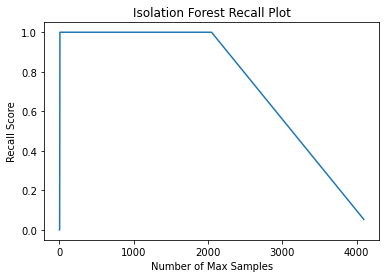

In [6]:
import matplotlib.pyplot as plt
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Recall Score')
plt.title('Isolation Forest Recall Plot')
plt.show()

The plot above shows the relationship between the number of samples used and the recall score. Recall can be thought of as the percent of anomalies that were detected out of all anomalies present. To make sure that we are detecting as many anomalies as possible, the graph indicates that the max sample parameter should be set to a value above 20. 

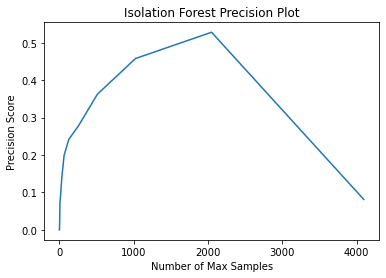

In [7]:
import matplotlib.pyplot as plt
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Precision Score')
plt.title('Isolation Forest Precision Plot')
plt.show()

Precision is a measurement that demonstrates how well the algorithm identifies anomalies only. In other words, high precision indicates a low false positive rate. 

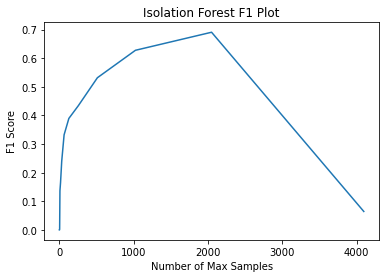

In [8]:
import matplotlib.pyplot as plt
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('F1 Score')
plt.title('Isolation Forest F1 Plot')
plt.show()

In [9]:
ilist

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

In [10]:
single_calculations(100)

[ 1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1
 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
 -1 -1  1  1]
r= 1.0 
p= 0.21542812560951824 
f= 0.3544892882933483


In [11]:
single_calculations(200)

[ 1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
 -1 -1  1  1]
r= 1.0 
p= 0.25930273506280077 
f= 0.4118195376584638


In [15]:
single_calculations(1500)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
r= 1.0 
p= 0.4931904442956017 
f= 0.6605861244019139


In [14]:
single_calculations(2000)

[ 1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
r= 1.0 
p= 0.5189100305379375 
f= 0.6832663161150634


In [17]:
single_calculations(3000)

[ 1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
r= 0.05341783612494341 
p= 0.06213796735123749 
f= 0.05744888023369036


It can be seen that as the number of max samples increases, the precision, recall, and f1 scores increase as well. That is, until the max samples value reaches beyond 2000. This is an interesting find, considering many applications of isolation forest have an optimal max sample value between 50 and 100. Here, however, it does appear that larger samples around 2000 are ideal. 